In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from scipy.stats.kde import gaussian_kde  # ,multivariate_normal
from scipy.stats import norm
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN,Birch,KMeans,estimate_bandwidth,MeanShift

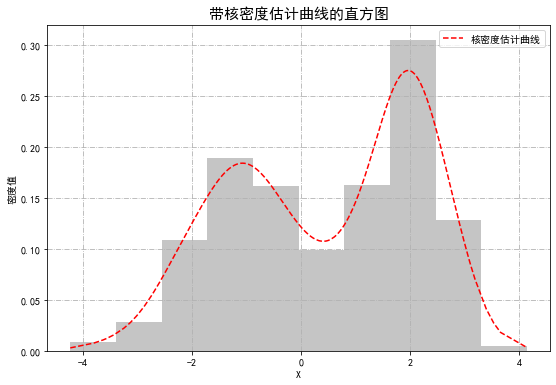

In [2]:
np.random.seed(123)
X1 = norm.rvs(loc=-1.0, scale=1, size=500) 
X2 = norm.rvs(loc=2.0, scale=0.6, size=500)
X = np.hstack([X1, X2])
fig=plt.figure(figsize=(9,6))
plt.hist(X, normed=True, alpha=0.45, color='gray')
probDensityFun = gaussian_kde(X)
plt.title("带核密度估计曲线的直方图", fontsize=15)
plt.plot(np.sort(X), probDensityFun(np.sort(X)),c='r',linestyle='--',label="核密度估计曲线")
plt.xlabel("X")
plt.ylabel("密度值")
plt.legend()
plt.grid(True,linestyle='-.')
plt.show()


<Figure size 720x288 with 0 Axes>

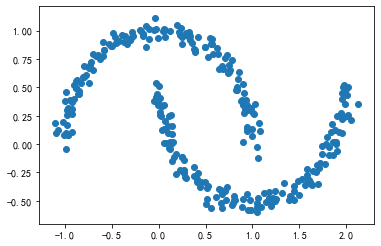

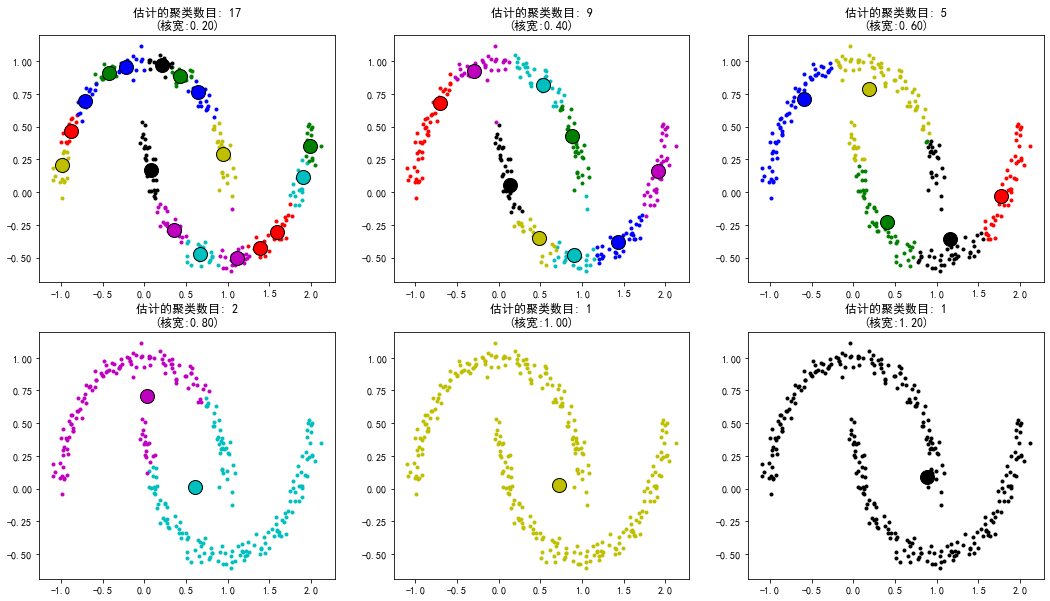

In [3]:
X, ymoon = make_moons(300, noise=0.05, random_state=0)
fig=plt.figure(figsize=(10,4))
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1])

fig=plt.figure(figsize=(18,10))
bandwidths=np.linspace(0.2,1.2,6)
colors = cycle('bgrcmyk')
i=0
for bandwidth in bandwidths:
    MS = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    MS.fit(X)
    cluster_centers = MS.cluster_centers_
    labels = np.unique(MS.labels_)
    n_clusters_ = len(labels)
    i+=1
    plt.subplot(2,3,i)
    for k, col in zip(range(n_clusters_), colors):
        cluster_center = cluster_centers[k]
        plt.plot(X[MS.labels_==k, 0], X[MS.labels_==k, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
    plt.title('估计的聚类数目: %d\n(核宽:%.2f)' % (n_clusters_,bandwidth))
plt.show()


代码说明：
（1）第1行：生成包含两个聚类变量X_1,X_2，样本量N=300，包含两个小类，外观大致呈“半月”形分布的模拟数据。
（2）第4行：绘制模拟数据的散点图
（3）第7行：指定Mean-Shift聚类中核宽h为：在[0.2,1.2]间均匀取6个值。
（4）第9至23行：利用for循环在不同核宽h下进行Mean-Shift聚类。可视化聚类结果。
